<a href="https://colab.research.google.com/github/mixhub10/dl16/blob/main/notebook/ch08_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Neural Network

## 평균 제곱 오차 vs 교차 엔트로피

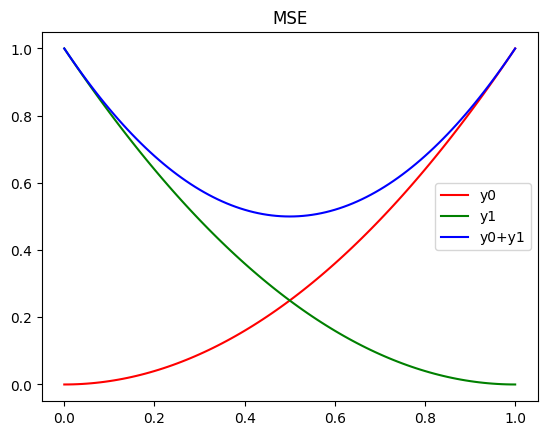

<ipython-input-2-201a176dff4c>:21: RuntimeWarning: divide by zero encountered in log
  y0 = -np.log(1-x)
<ipython-input-2-201a176dff4c>:22: RuntimeWarning: divide by zero encountered in log
  y1 = -np.log(x)


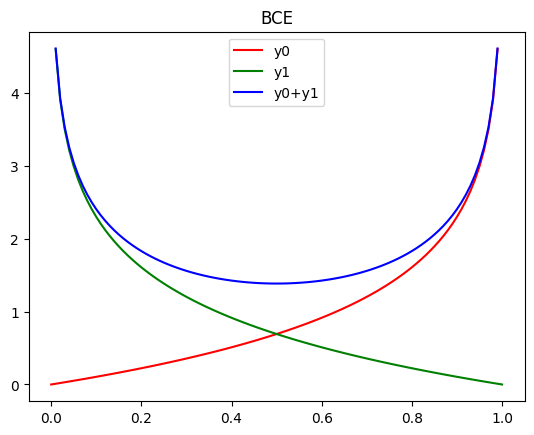

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# MSE
# mse(y,y_hat) = (y - y_hat)**2
#
x = np.linspace(0.0, 1.0, 101) 
y0 = np.square(x)
y1 = np.square(1-x)
plt.plot(x, y0, 'r') 
plt.plot(x, y1, 'g') 
plt.plot(x, y0+y1, 'b') 
plt.title('MSE')
plt.legend(['y0','y1','y0+y1'])
plt.show() 

# BCE
# bce(y,y_hat) = - y log(y_hat) - (1-y) log(1-y_hat)
#
x = np.linspace(0.0, 1.0, 101) 
y0 = -np.log(1-x)
y1 = -np.log(x)
plt.plot(x, y0, 'r') 
plt.plot(x, y1, 'g') 
plt.plot(x, y0+y1, 'b') 
plt.title('BCE')
plt.legend(['y0','y1','y0+y1'])
plt.show() 

## 다중 분류 (CategoricalCrossentropy)

- 우리가 분류해야할 부류가 두 개 이상일 때 사용

In [3]:
# import numpy as np
import tensorflow as tf

# BinaryCrossentropy
y_true = [  [1],   [0],   [0],   [1]]  
y_pred = [[0.8], [0.3], [0.5], [0.9]]   
# y_pred = [[1.0], [0.3], [0.5], [1.0]]   
bce = tf.keras.losses.BinaryCrossentropy()
print(bce(y_true, y_pred).numpy())


0.3445814


In [4]:
      
# CategoricalCrossentropy
y_true = [[0.0, 1.0, 0.0], [0.0, 0.0, 1.0], [1.0, 0.0, 0.0]] # 고양이, 호랑이, 강아지
y_pred = [[0.6, 0.3, 0.1], [0.3, 0.6, 0.1], [0.1, 0.7, 0.2]]
cce = tf.keras.losses.CategoricalCrossentropy ()
print(cce(y_true, y_pred).numpy ())      


1.936381


In [5]:

y_true = [ 12 , 20 , 29 , 60 ]
y_pred = [ 14 , 18 , 27 , 55 ]
mse = tf.keras.losses.MeanSquaredError ()
print(mse(y_true, y_pred).numpy())



9


In [6]:
#########################################
def  custom_loss_function (y_true, y_pred) :
   squared_difference = tf.square (y_true-y_pred)
   return tf.reduce_mean (squared_difference, axis = -1 )

import numpy as np
custom_loss_function(np.array(y_true), np.array(y_pred)).numpy()


9

### SparseCategoricalCrossentropy

- 정답 레이블이 원-핫 인코딩이 아니고 정수로 주어지면 사용

## 범주형 데이터 처리

- 입력 데이터 중에는 male, female과 같은 카테고리를 가지는 데이터들이 아주 많음 -> 숫자로 바꾸어야 함

In [ ]:
# 간단한 경우
# for ix in train.index:
#   if train.loc[ix, 'sex'] == 'male':
#     train.loc[ix,'sex'] =1
#   else:
#     train.loc[ix,'sex'] = 0

## 일반적인 범주형 데이터 변환 방법

- 범주형 변수를 인코딩하는 3가지 방법

1. 정수 인코딩 : 각 레이블이 정수로 매핑되는 경우
2. 원-핫 인코딩 : 각 레이블이 이진 벡터에 매핑되는 경우
3. 임베딩 : 범주의 분산된 표현이 학습되는 경우이다.

### 정수 인코딩

In [1]:
import numpy as np
X = np.array([['Korea', 44, 7200],
		      ['Japan', 27, 4800],
	          ['China', 30, 6100]])

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X[:, 0] = labelencoder.fit_transform(X[:, 0])
print(X)


[['2' '44' '7200']
 ['1' '27' '4800']
 ['0' '30' '6100']]


### 원-핫 인코딩

- 단 하나의 값만 1이고 나머지는 모두 0인 인코딩을 의미함

In [8]:
import numpy as np
X = np.array([['Korea', 44, 7200], 
		['Japan', 27, 4800], 
		['China', 30, 6100]])

from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()

# 원하는 열을 뽑아서 2차원 배열로 만들어서 전달하여야 한다. 
XX = onehotencoder.fit_transform(X[:,0].reshape(-1,1)).toarray()
print(XX)


[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [9]:

X = np.delete(X, [0], axis=1)		# 0번째 열 삭제
X = np.concatenate((XX, X), axis = 1)	# X와 XX를 붙인다. 
print(X)

[['0.0' '0.0' '1.0' '44' '7200']
 ['0.0' '1.0' '0.0' '27' '4800']
 ['1.0' '0.0' '0.0' '30' '6100']]


###  one_hot(keras)_A
- keras의 to_categorical()을 호출해서 만들수도 있음

In [10]:
# one_hot(keras)_A
#keras의 to_categorical()을 호출해서 만들수도 있음
class_vector =[2, 6, 6, 1]
  
from tensorflow.keras.utils import to_categorical
output = to_categorical(class_vector, num_classes = 7, dtype ="int32")
print(output)


[[0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1]
 [0 1 0 0 0 0 0]]


In [11]:
#
# mnist data
#
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
print(x_train.shape,y_train.shape)

y_train[:10]

y_train_one_hot = to_categorical(y_train, num_classes = 10) #, dtype ="int32")
y_train_one_hot.shape
y_train_one_hot[:10]
# y_train[:10]


11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

## 데이터 정규화

- 부동 소수점 숫자 정밀도와 관련된 문제를 피하기 위해, 입력 값이 대략 -1.0에서 1.0 범위에 있도록 하는 것이 좋음

### sklearn의 데이터 정규화

In [12]:
from sklearn.preprocessing import MinMaxScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]

scaler = MinMaxScaler()
scaler.fit(data)		# 최대값과 최소값을 알아낸다. 
print(scaler.transform(data))	# 데이터를 변환한다. 


[[0.   0.  ]
 [0.25 0.25]
 [0.5  0.5 ]
 [1.   1.  ]]


In [13]:

# StandardScaler()
from sklearn.preprocessing import StandardScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
# data = [[-1, 2, 7], [-0.5, 6, 3], [0, 10, -2], [1, 18, 6]]

scaler = StandardScaler()
scaler.fit(data)		# 평균=0, 분산=std 로 데이터 변경
print(scaler.transform(data))	# 데이터를 변환한다. 


[[-1.18321596 -1.18321596]
 [-0.50709255 -0.50709255]
 [ 0.16903085  0.16903085]
 [ 1.52127766  1.52127766]]


### 케라스의 데이터 정규화

In [14]:
import numpy as np
from  tensorflow.keras.layers.experimental.preprocessing import Normalization

input_data = np.array([[1.], [2.], [3.]], np.float32)
layer = Normalization()
print(layer(input_data))


tf.Tensor(
[[1.]
 [2.]
 [3.]], shape=(3, 1), dtype=float32)


In [16]:
#
adapt_data = np.array([[1.], [2.], [3.], [4.], [5.]], dtype=np.float32)
input_data = np.array([[1.], [2.], [3.]], np.float32)
layer = Normalization()
layer.adapt(adapt_data)
print(layer(input_data))

tf.Tensor(
[[-1.4142135 ]
 [-0.70710677]
 [ 0.        ]], shape=(3, 1), dtype=float32)


## 과잉 적합과 과소 적합


### 과잉 적합 (overfitting) : imdb 데이터 사용

- 자니치게 훈련 데이터에 특화돼 실제 적용 시 좋지 못한 결과가 나오는 것을 말함

- 과잉 적합 방지 전략

1. 조기 종료 : 검증 손실이 증가하면 훈련을 조기에 종료함
2. 가중치 규제 : 가중치의 절대값을 제한함
3. 데이터 증강 : 데이터를 많이 만듬
4. 드롭아웃 : 몇개의 뉴런을 쉬게 함

#### imdb 리뷰가 긍정적인지 부정적인지 파악

In [17]:
import numpy as numpy
import tensorflow as tf
import matplotlib.pyplot as plt
# 데이터 다운로드
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.imdb.load_data( num_words=1000)
# imdb.data_load()의 인자로 num_words를 사용하면 이 데이터에서 등장 빈도 순위로
# 몇 등까지의 단어를 사용할 것인지를 의미
# 원-핫 인코딩으로 변환하는 함수
def one_hot_sequences(sequences, dimension=1000):
  results = numpy.zeros((len(sequences), dimension))
  for i, word_index in enumerate(sequences):
    results[i, word_index] = 1.
  return results

train_data = one_hot_sequences(train_data)
test_data = one_hot_sequences(test_data)

17464789/17464789 [==============================] - 0s 0us/step


In [18]:
# 신경망 모델 구축
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(1000,)))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',

metrics=['accuracy'])
# 신경망 훈련, 검증 데이터 전달
history = model.fit(train_data,
train_labels,
epochs=20,
batch_size=512,
validation_data=(test_data, test_labels),
verbose=2)

Epoch 1/20
49/49 - 2s - loss: 0.5828 - accuracy: 0.7078 - val_loss: 0.4483 - val_accuracy: 0.8168 - 2s/epoch - 42ms/step
Epoch 2/20
49/49 - 0s - loss: 0.3786 - accuracy: 0.8454 - val_loss: 0.3469 - val_accuracy: 0.8548 - 407ms/epoch - 8ms/step
Epoch 3/20
49/49 - 0s - loss: 0.3255 - accuracy: 0.8643 - val_loss: 0.3306 - val_accuracy: 0.8597 - 426ms/epoch - 9ms/step
Epoch 4/20
49/49 - 0s - loss: 0.3095 - accuracy: 0.8743 - val_loss: 0.3296 - val_accuracy: 0.8599 - 419ms/epoch - 9ms/step
Epoch 5/20
49/49 - 0s - loss: 0.3032 - accuracy: 0.8763 - val_loss: 0.3281 - val_accuracy: 0.8598 - 379ms/epoch - 8ms/step
Epoch 6/20
49/49 - 0s - loss: 0.2983 - accuracy: 0.8773 - val_loss: 0.3292 - val_accuracy: 0.8601 - 402ms/epoch - 8ms/step
Epoch 7/20
49/49 - 0s - loss: 0.2944 - accuracy: 0.8798 - val_loss: 0.3301 - val_accuracy: 0.8602 - 398ms/epoch - 8ms/step
Epoch 8/20
49/49 - 0s - loss: 0.2888 - accuracy: 0.8808 - val_loss: 0.3325 - val_accuracy: 0.8596 - 422ms/epoch - 9ms/step
Epoch 9/20
49/49 -

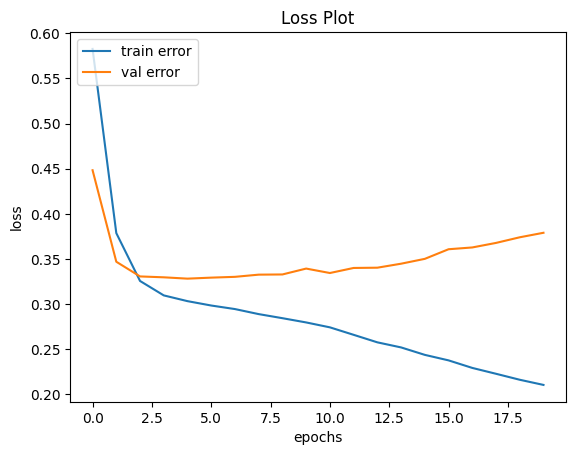

In [19]:
# 훈련 데이터의 손실값과 검증 데이터의 손실값을 그래프에 출력
history_dict = history.history
loss_values = history_dict['loss'] # 훈련 데이터 손실값
val_loss_values = history_dict['val_loss'] # 검증 데이터 손실값
acc = history_dict['accuracy'] # 정확도
epochs = range(1, len(acc) + 1) # 에포크 수
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Plot')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train error', 'val error'], loc='upper left')
plt.show()

#### 가중치 규제

- L1
- L2

In [20]:
# 신경망 모델 구축
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16,
kernel_regularizer=tf.keras.regularizers.l2(0.001), # regularizers를 사용하여 가중치를 제한함
activation='relu', input_shape=(1000,)))
model.add(tf.keras.layers.Dense(16,
kernel_regularizer=tf.keras.regularizers.l2(0.001), activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

Epoch 1/20
49/49 - 2s - loss: 0.6442 - accuracy: 0.7026 - val_loss: 0.5134 - val_accuracy: 0.8070 - 2s/epoch - 32ms/step
Epoch 2/20
49/49 - 0s - loss: 0.4321 - accuracy: 0.8398 - val_loss: 0.3940 - val_accuracy: 0.8530 - 456ms/epoch - 9ms/step
Epoch 3/20
49/49 - 1s - loss: 0.3715 - accuracy: 0.8642 - val_loss: 0.3751 - val_accuracy: 0.8585 - 546ms/epoch - 11ms/step
Epoch 4/20
49/49 - 1s - loss: 0.3549 - accuracy: 0.8716 - val_loss: 0.3741 - val_accuracy: 0.8586 - 676ms/epoch - 14ms/step
Epoch 5/20
49/49 - 1s - loss: 0.3485 - accuracy: 0.8725 - val_loss: 0.3686 - val_accuracy: 0.8606 - 1s/epoch - 25ms/step
Epoch 6/20
49/49 - 1s - loss: 0.3442 - accuracy: 0.8734 - val_loss: 0.3658 - val_accuracy: 0.8600 - 655ms/epoch - 13ms/step
Epoch 7/20
49/49 - 1s - loss: 0.3392 - accuracy: 0.8746 - val_loss: 0.3641 - val_accuracy: 0.8606 - 722ms/epoch - 15ms/step
Epoch 8/20
49/49 - 1s - loss: 0.3367 - accuracy: 0.8758 - val_loss: 0.3635 - val_accuracy: 0.8596 - 750ms/epoch - 15ms/step
Epoch 9/20
49/4

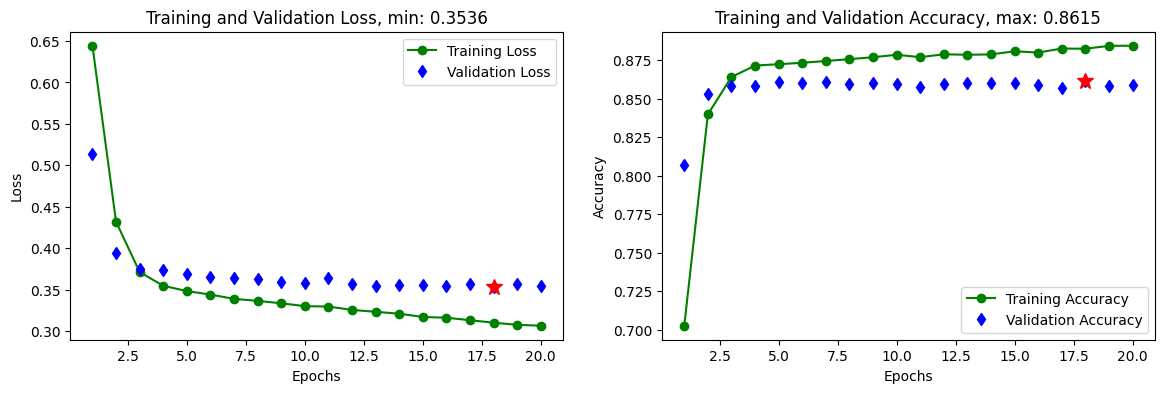

In [37]:
# L2 규제
import numpy as numpy
import tensorflow as tf
import matplotlib.pyplot as plt

# 데이터 다운로드
(train_data, train_labels), (test_data, test_labels) = \
    tf.keras.datasets.imdb.load_data( num_words=1000)

# 원-핫 인코딩으로 변환하는 함수
def one_hot_sequences(sequences, dimension=1000):
    results = numpy.zeros((len(sequences), dimension))
    for i, word_index in enumerate(sequences):
        results[i, word_index] = 1.
    return results

train_data = one_hot_sequences(train_data)
test_data = one_hot_sequences(test_data)

# 신경망 모델 구축
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, 
	kernel_regularizer=tf.keras.regularizers.l2(0.001),  
	activation='relu', input_shape=(1000,)))
model.add(tf.keras.layers.Dense(16,		 
	kernel_regularizer=tf.keras.regularizers.l2(0.001),  activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',
                  metrics=['accuracy'])

# 신경망 훈련, 검증 데이터 전달
history = model.fit(train_data,
                    train_labels,
                    epochs=20,
                    batch_size=512,
                    validation_data=(test_data, test_labels),
                    verbose=2)
# 훈련 데이터의 손실값과 검증 데이터의 손실값을 그래프에 출력
#############################################
# More training graphs
# More graphs of loss and accuracy
# import matplotlib.pyplot as plt
import numpy as np

history_dict = history.history 
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],4)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'go-', label='Training Accuracy') #, c='blue')
plt.plot(epochs, val_acc, 'bd', label='Validation Accuracy') #, c='red')
plt.plot(np.argmax(np.array(val_acc))+1,val_acc[np.argmax(np.array(val_acc))], 'r*', ms=12)
plt.title('Training and Validation Accuracy, max: ' + str(np.round(val_acc[np.argmax(np.array(val_acc))],4)))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### 드롭아웃

In [21]:
# 신경망 모델 구축
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(tf.keras.layers.Dropout(0.5)) # dropout을 지정
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

Epoch 1/20
49/49 - 2s - loss: 0.6895 - accuracy: 0.5203 - val_loss: 0.6568 - val_accuracy: 0.6703 - 2s/epoch - 38ms/step
Epoch 2/20
49/49 - 0s - loss: 0.6299 - accuracy: 0.6266 - val_loss: 0.5291 - val_accuracy: 0.8049 - 406ms/epoch - 8ms/step
Epoch 3/20
49/49 - 0s - loss: 0.5378 - accuracy: 0.7241 - val_loss: 0.4301 - val_accuracy: 0.8415 - 392ms/epoch - 8ms/step
Epoch 4/20
49/49 - 0s - loss: 0.4694 - accuracy: 0.7834 - val_loss: 0.3687 - val_accuracy: 0.8517 - 402ms/epoch - 8ms/step
Epoch 5/20
49/49 - 0s - loss: 0.4325 - accuracy: 0.8124 - val_loss: 0.3516 - val_accuracy: 0.8550 - 411ms/epoch - 8ms/step
Epoch 6/20
49/49 - 0s - loss: 0.4113 - accuracy: 0.8269 - val_loss: 0.3376 - val_accuracy: 0.8575 - 360ms/epoch - 7ms/step
Epoch 7/20
49/49 - 0s - loss: 0.3942 - accuracy: 0.8364 - val_loss: 0.3318 - val_accuracy: 0.8579 - 358ms/epoch - 7ms/step
Epoch 8/20
49/49 - 0s - loss: 0.3776 - accuracy: 0.8425 - val_loss: 0.3271 - val_accuracy: 0.8596 - 341ms/epoch - 7ms/step
Epoch 9/20
49/49 -

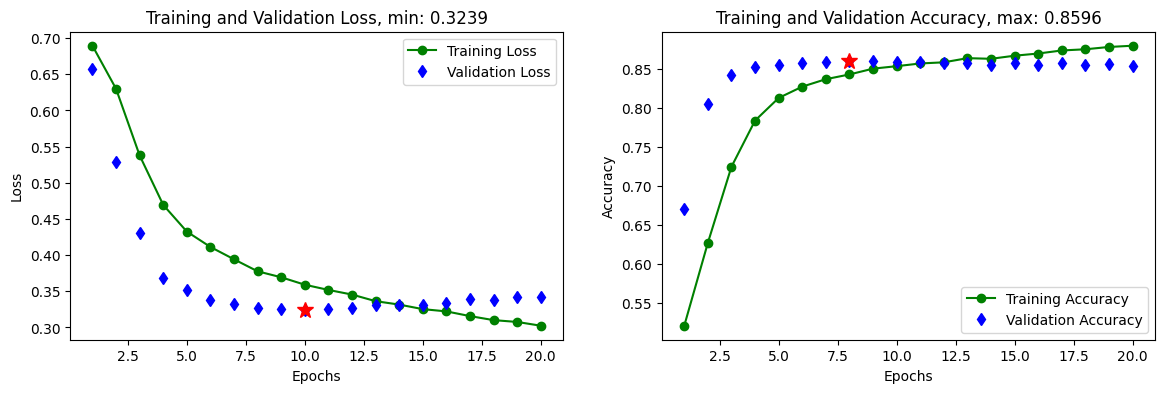

In [38]:
import numpy as numpy
import tensorflow as tf
import matplotlib.pyplot as plt

# 데이터 다운로드
(train_data, train_labels), (test_data, test_labels) = \
    tf.keras.datasets.imdb.load_data( num_words=1000)

# 원-핫 인코딩으로 변환하는 함수
def one_hot_sequences(sequences, dimension=1000):
    results = numpy.zeros((len(sequences), dimension))
    for i, word_index in enumerate(sequences):
        results[i, word_index] = 1.
    return results

train_data = one_hot_sequences(train_data)
test_data = one_hot_sequences(test_data)

# 신경망 모델 구축
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(1000,)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam',
                  metrics=['accuracy'])

# 신경망 훈련, 검증 데이터 전달
history = model.fit(train_data,
                    train_labels,
                    epochs=20,
                    batch_size=512,
                    validation_data=(test_data, test_labels),
                    verbose=2)
# 훈련 데이터의 손실값과 검증 데이터의 손실값을 그래프에 출력
#############################################
# More training graphs
# More graphs of loss and accuracy
# import matplotlib.pyplot as plt
import numpy as np

history_dict = history.history 
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],4)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'go-', label='Training Accuracy') #, c='blue')
plt.plot(epochs, val_acc, 'bd', label='Validation Accuracy') #, c='red')
plt.plot(np.argmax(np.array(val_acc))+1,val_acc[np.argmax(np.array(val_acc))], 'r*', ms=12)
plt.title('Training and Validation Accuracy, max: ' + str(np.round(val_acc[np.argmax(np.array(val_acc))],4)))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 데이터 증강 방법

- 소량의 훈련 데이터에서 많은 훈련데이터를 뽑아내는 방법

## 앙상블

- 여러 전문가를 동시에 훈련시키는 것과 같음
이 방법은 동일한 딥러닝 신경망을 N개를 만드는 것

- 각 신경망을 독립적으로 학습시킨 후에 마지막에 합치는 것

------

# DNN 응용 예제

- MNIST
- Fashion MNIST
- Titanic survival

## MNIST 필기체 숫자 인식

In [22]:
import matplotlib.pyplot as plt
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print(x_train.shape,y_train.shape)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation='softmax'))


(60000, 28, 28) (60000,)


In [23]:

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, 
          epochs=20,
          validation_data=(x_test, y_test),
          verbose=1)

model.evaluate(x_test, y_test)


Epoch 1/20
1875/1875 [==============================] - 20s 10ms/step - loss: 0.2164 - accuracy: 0.9363 - val_loss: 0.0952 - val_accuracy: 0.9700
Epoch 2/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0956 - accuracy: 0.9707 - val_loss: 0.0928 - val_accuracy: 0.9700
Epoch 3/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0667 - accuracy: 0.9796 - val_loss: 0.0731 - val_accuracy: 0.9764
Epoch 4/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0527 - accuracy: 0.9838 - val_loss: 0.0701 - val_accuracy: 0.9770
Epoch 5/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0423 - accuracy: 0.9862 - val_loss: 0.0673 - val_accuracy: 0.9796
Epoch 6/20
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0353 - accuracy: 0.9887 - val_loss: 0.0673 - val_accuracy: 0.9803
Epoch 7/20
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0327 - accuracy: 0.9890 - val_loss: 0.0724 - val

[0.09383315593004227, 0.9821000099182129]

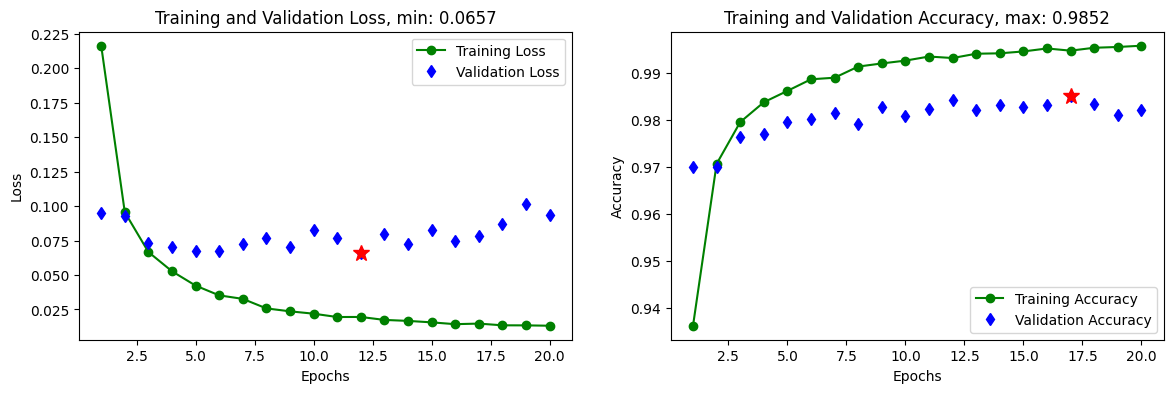

In [24]:
#############################################
# More training graphs
# More graphs of loss and accuracy
# import matplotlib.pyplot as plt
import numpy as np

history_dict = history.history 
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],4)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'go-', label='Training Accuracy') #, c='blue')
plt.plot(epochs, val_acc, 'bd', label='Validation Accuracy') #, c='red')
plt.plot(np.argmax(np.array(val_acc))+1,val_acc[np.argmax(np.array(val_acc))], 'r*', ms=12)
plt.title('Training and Validation Accuracy, max: ' + str(np.round(val_acc[np.argmax(np.array(val_acc))],4)))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



## fashion MNIST 아이템 분류

4422102/4422102 [==============================] - 0s 0us/step


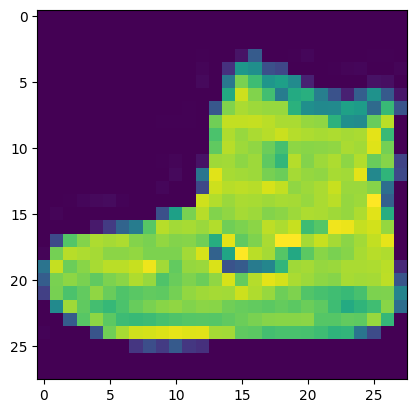

In [25]:
# import tensorflow as tf
# from tensorflow import keras
# import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

fashion_mnist = datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# print(train_images.shape,train_labels.shape)
# print(train_labels[:10])

plt.imshow(train_images[0])

train_images = train_images / 255.0
test_images = test_images / 255.0

model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [26]:

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, 
          epochs=25,
          validation_data=(test_images, test_labels),
          verbose=1)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('정확도:', test_acc)


Epoch 1/25
1875/1875 [==============================] - 13s 6ms/step - loss: 0.5008 - accuracy: 0.8254 - val_loss: 0.4821 - val_accuracy: 0.8262
Epoch 2/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3775 - accuracy: 0.8643 - val_loss: 0.4240 - val_accuracy: 0.8432
Epoch 3/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3405 - accuracy: 0.8756 - val_loss: 0.3591 - val_accuracy: 0.8714
Epoch 4/25
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3157 - accuracy: 0.8846 - val_loss: 0.3652 - val_accuracy: 0.8699
Epoch 5/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2986 - accuracy: 0.8899 - val_loss: 0.3500 - val_accuracy: 0.8741
Epoch 6/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2816 - accuracy: 0.8960 - val_loss: 0.3606 - val_accuracy: 0.8713
Epoch 7/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2692 - accuracy: 0.9001 - val_loss: 0.3422 - val_accu

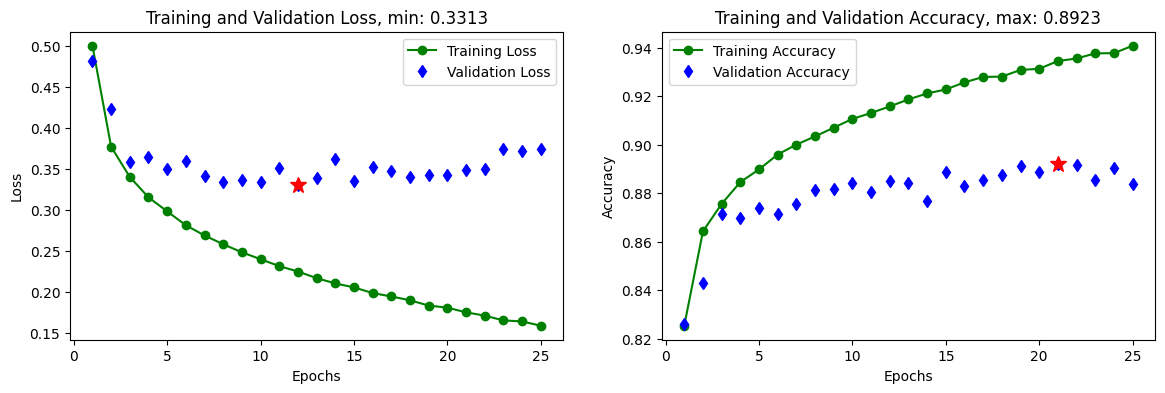

In [27]:
#############################################
# More training graphs
# More graphs of loss and accuracy
# import matplotlib.pyplot as plt
import numpy as np

history_dict = history.history 
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],4)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'go-', label='Training Accuracy') #, c='blue')
plt.plot(epochs, val_acc, 'bd', label='Validation Accuracy') #, c='red')
plt.plot(np.argmax(np.array(val_acc))+1,val_acc[np.argmax(np.array(val_acc))], 'r*', ms=12)
plt.title('Training and Validation Accuracy, max: ' + str(np.round(val_acc[np.argmax(np.array(val_acc))],4)))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## Titanic survival 예측

In [29]:
import numpy as np
import pandas as pd
import tensorflow as tf

# 데이터 세트를 읽어들인다. 
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dle/dl-express-src/chap08/train.csv", sep=',')
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dle/dl-express-src/chap08/test.csv", sep=',')
print(train.shape)

(891, 12)


In [30]:

# 필요없는 컬럼을 삭제한다. 
train.drop(['SibSp', 'Parch', 'Ticket', 'Embarked', 'Name','Cabin', 'PassengerId', 'Fare', 'Age'], inplace=True, axis=1)
print(train.shape)
train.head()

(891, 3)


,Survived,Pclass,Sex
0,0,3,male
1,1,1,female
2,1,3,female
3,1,1,female
4,0,3,male


In [31]:

train.isna().sum()
train.duplicated().sum()
# 결손치가 있는 데이터 행은 삭제한다. 
train.dropna(inplace=True)
train.shape

(891, 3)

In [32]:

# 기호를 수치로 변환한다. 
for ix in train.index:
    if train.loc[ix, 'Sex']=="male":
       train.loc[ix, 'Sex']=1 
    else:
       train.loc[ix, 'Sex']=0 

train.head()

,Survived,Pclass,Sex
0,0,3,1
1,1,1,0
2,1,3,0
3,1,1,0
4,0,3,1


In [33]:

# 2차원 배열을 1차원 배열로 평탄화한다. 
target = np.ravel(train.Survived) 
target.shape

(891,)

In [34]:

# 생존여부를 학습 데이터에서 삭제한다. 
train.drop(['Survived'], inplace=True, axis=1)
train = train.astype(float)     # 최근 소스에서는 float형태로 형변환하여야 
train.shape
train.head()

,Pclass,Sex
0,3.0,1.0
1,1.0,0.0
2,3.0,0.0
3,1.0,0.0
4,3.0,1.0


In [35]:

# 케라스 모델을 생성한다. 
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(2,)))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# 케라스 모델을 컴파일한다. 
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# 케라스 모델을 학습시킨다. 
model.fit(train, target, epochs=30, batch_size=1, verbose=1)


Epoch 1/30
891/891 [==============================] - 3s 2ms/step - loss: 0.5683 - accuracy: 0.7059
Epoch 2/30
891/891 [==============================] - 2s 2ms/step - loss: 0.5208 - accuracy: 0.7879
Epoch 3/30
891/891 [==============================] - 2s 2ms/step - loss: 0.5074 - accuracy: 0.7845
Epoch 4/30
891/891 [==============================] - 1s 2ms/step - loss: 0.4960 - accuracy: 0.7879
Epoch 5/30
891/891 [==============================] - 2s 2ms/step - loss: 0.4896 - accuracy: 0.7856
Epoch 6/30
891/891 [==============================] - 2s 2ms/step - loss: 0.4820 - accuracy: 0.7912
Epoch 7/30
891/891 [==============================] - 2s 2ms/step - loss: 0.4810 - accuracy: 0.7935
Epoch 8/30
891/891 [==============================] - 1s 2ms/step - loss: 0.4772 - accuracy: 0.7856
Epoch 9/30
891/891 [==============================] - 2s 2ms/step - loss: 0.4775 - accuracy: 0.7834
Epoch 10/30
891/891 [==============================] - 2s 2ms/step - loss: 0.4739 - accuracy: 0.7789

In [36]:

######################################
# 훈련시킨 모델을 테스트 데이터에 적용 : 생사 예측
######################################
# test model
# 필요없는 컬럼을 삭제한다. 
test.drop(['SibSp', 'Parch', 'Ticket', 'Embarked', 'Name',\
        'Cabin', 'PassengerId', 'Fare', 'Age'], inplace=True, axis=1)

# 결손치가 있는 데이터 행은 삭제한다. 
test.isna().sum()
test.dropna(inplace=True)

# 기호를 수치로 변환한다. 
for ix in test.index:
    if test.loc[ix, 'Sex']=="male":
       test.loc[ix, 'Sex']=1 
    else:
       test.loc[ix, 'Sex']=0 

# 2차원 배열을 1차원 배열로 평탄화한다. 
# target_test = np.ravel(test.Survived) 
# 생존여부를 학습 데이터에서 삭제한다. 
# test.drop(['Survived'], inplace=True, axis=1)
test = test.astype(float)     
test.shape   # (418,2)
# 학습된 model을 이용해서 tset 데이터에 대한 생존 예측
pred_test = model.predict(test, batch_size=1)
# Survival
np.where(pred_test >= 0.5)[0].size  # 152
# Dead
np.where(pred_test < 0.5)[0].size   # 266

418/418 [==============================] - 1s 1ms/step


266